In [2]:
import pandas as pd
file=pd.read_csv("C:/Users/Sinegalatha/Desktop/Imarticus Learning/0.MKCE/Datasets/Social_Network_Ads.csv")
df=pd.DataFrame(file)

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [5]:
df[df.duplicated()]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [6]:
df.drop(['User ID'],axis=1,inplace=True)

In [7]:
df['Gender']=pd.get_dummies(df['Gender'])

In [8]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19.0,19000.0,0
1,0,35.0,20000.0,0
2,1,26.0,43000.0,0
3,1,27.0,57000.0,0
4,0,19.0,76000.0,0
...,...,...,...,...
395,1,46.0,41000.0,1
396,0,51.0,23000.0,1
397,1,50.0,20000.0,1
398,0,36.0,33000.0,0


In [9]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [12]:
x

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca_x=pca.fit_transform(x)
print(pca_x.shape)
print(x.shape)

(400, 1)
(400, 3)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(pca_x,y,random_state=42)

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier=classifier.fit(x_train,y_train)

In [20]:
y_pred=classifier.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score,auc
cons=confusion_matrix(y_test,y_pred)
print(cons)
acc=accuracy_score(y_test,y_pred)
print(acc)
c=classification_report(y_test,y_pred)
print(c)

[[57  6]
 [14 23]]
0.8
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        63
           1       0.79      0.62      0.70        37

    accuracy                           0.80       100
   macro avg       0.80      0.76      0.77       100
weighted avg       0.80      0.80      0.79       100



[0.53057143 0.97145254 0.03601637 0.82388822 0.04871328 0.05486196
 0.87913592 0.08217404 0.25890075 0.28123148 0.1209277  0.79177976
 0.0179283  0.0157803  0.09209237 0.41473114 0.7468099  0.56029873
 0.15841927 0.86173948 0.01876983 0.06189849 0.52560642 0.95574056
 0.01273914 0.71471655 0.37307813 0.1190279  0.99317414 0.01461182
 0.45960393 0.01189707 0.94518539 0.05191757 0.61363813 0.1274876
 0.12084075 0.18718512 0.02543714 0.01212389 0.52904451 0.02138942
 0.00791265 0.54458708 0.0100229  0.98176035 0.03880125 0.07619865
 0.51065708 0.08792747 0.03413384 0.87532686 0.16560574 0.0353164
 0.22733662 0.03479905 0.9864314  0.29849511 0.06885894 0.07288424
 0.24809552 0.10803207 0.88821283 0.08316187 0.03259037 0.71435952
 0.52109767 0.99376644 0.19888598 0.46423103 0.99592928 0.01942362
 0.02785574 0.02082516 0.4758512  0.10271159 0.99668072 0.84337485
 0.10193179 0.21535704 0.03319318 0.44985523 0.93006952 0.36885645
 0.91259406 0.50507378 0.21485793 0.609913   0.05067294 0.024461

Text(0, 0.5, 'True Positive Rate (specificity)')

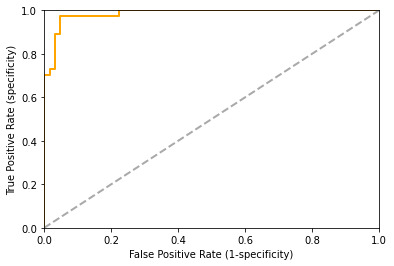

In [17]:
from sklearn.metrics import auc
y_proba=classifier.predict_proba(x_test)
y_predicted=y_proba[:,1]
print(y_predicted)
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)
roc_auc=auc(fpr,tpr)
print("Area under curve for first model",roc_auc)
import matplotlib.pyplot as mtp
mtp.figure()
mtp.plot(fpr,tpr,color='orange',lw=2,label='ROC curve (area under curve =%0.2f)'%roc_auc)
mtp.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
mtp.xlim([0.0,1.0])
mtp.ylim([0.0,1.0])
mtp.xlabel('False Positive Rate (1-specificity)')
mtp.ylabel('True Positive Rate (specificity)')